
<p align="center">
    <img src="mosef.png" alt="MOSEF Logo" width="300">
</p>
```
</p>

<a href="https://linkedin.com/in/lucasvazelle">Vazelle Lucas  </a> $\cdot$ 
<a href="https://www.linkedin.com/in/mariam-tarverdian">Taverdian Mariam </a> $\cdot$ 2024-2025, MOSEF $\cdot$ 


---


- [Projet Kaggel ](https://www.kaggle.com/competitions/mosef-bank-churn-prediction/)


In [1]:
import pandas as pd
# ajouter stratégie de validation ! 

# 1. Import data <a class="anchor" id="Introduction"></a>
---


In [7]:

train_data_path = 'data/train.csv'
test_data_path = 'data/test.csv'

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print("Training Data:")
display(train.head())

print("Testing Data:")
display(test.head())

Training Data:


id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0   0  15713774.0      Hsieh        683.0   Germany    Male  49.0     7.0   
1   1  15682533.0      Hs?eh        608.0    France  Female  30.0    10.0   
2   2  15791550.0       Tsou        539.0    France  Female  32.0     8.0   
3   3  15762762.0  Chiawuotu        530.0     Spain  Female  39.0     8.0   
4   4  15756475.0     Nnamdi        613.0    France  Female  45.0    10.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0  123837.86            2.0        1.0             1.0        138700.75   
1       0.00            2.0        1.0             1.0        146723.72   
2       0.00            1.0        1.0             1.0         94873.60   
3       0.00            2.0        0.0             0.0        177896.93   
4       0.00            2.0        1.0             1.0        116748.14   

   Exited  
0     1.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

Testing Data:


id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  15000  15797736.0  Chikwendu        591.0   Germany  Female  32.0     2.0   
1  15001  15676515.0        Lai        553.0     Spain    Male  37.0     2.0   
2  15002  15701291.0   Folliero        646.0    France  Female  29.0     7.0   
3  15003  15594812.0  Trevisani        603.0   Germany    Male  49.0     8.0   
4  15004  15791321.0     Ch'ien        645.0     Spain  Female  39.0     3.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0  106881.50            2.0        1.0             0.0        122810.53  
1       0.00            2.0        1.0             0.0         63736.17  
2       0.00            2.0        1.0             0.0        121866.87  
3  131394.56            1.0        0.0             1.0        147059.28  
4       0.00            2.0        1.0             0.0        129975.94

In [8]:
train.isnull().sum()
# pas de na

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
train.dtypes
# pas de surprises pour les types

id                   int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

# 1. Premier traitement <a class="anchor" id="Introduction"></a>
---


0. Si plusieurs observtion correspondent à la même personne et qu'il prends un gros poids, tout sera biaisé..il faut vérifier l'indépendances des observations

1. enlever variables d'informations inutiles OK

2. gérer muticolinéarité OK 

3. encoder variable Gender Age (one hot encoding ou autre) OK

4. Outlier OK

5. créer des variables pertinentes (min max,..)


7. garder que colonnes que l'on comprends : RFE, BORUTA,..

8. CHoix métrique

ID client : un identifiant unique pour chaque client

Nom : Le nom ou prénom du client

Score de crédit : une valeur numérique représentant le score de crédit du client

Géographie : Le pays où réside le client (France, Espagne ou Allemagne)

Sexe : Le sexe du client (homme ou femme)

Âge : L'âge du client.

Ancienneté : le nombre d'années pendant lesquelles le client est un client

Solde : Le solde du compte du client

NumOfProducts : Le nombre de produits bancaires utilisés par le client (par exemple, compte d'épargne, carte de crédit)

HasCrCard : si le client possède une carte de crédit (1 = oui, 0 = non)

IsActiveMember : si le client est un membre actif (1 = oui, 0 = non)

Salaire estimé : Le salaire estimé du client

Sortie : si le client a quitté le service (1 = oui, 0 = non)

## enlever les observations dépendantes

 Gestion des doublons

Pour les doublons identifiés dans les données, nous appliquons les règles suivantes :

1. Pour les doublons ayant les mêmes `CustomerID`, `Surname`, `Gender` et `Geography`, nous gardons l'observation avec l'`Age` le plus élevé afin d'avoir l'observation la plus récente.
2. Pour les doublons ayant les mêmes `CustomerID`, `Surname` et `Gender`, nous gardons également l'observation avec l'`Age` le plus élevé, car il est probable qu'il s'agisse des mêmes individus ayant changé de domiciliation.
3. Pour les doublons ayant les mêmes `CustomerID`, `Surname` et `Geography`, nous conservons les deux observations, même si cela peut introduire un biais, car il n'est pas possible de définir une règle de dédoublonnage pertinente dans ce cas.
```

In [10]:
train_traitement.drop_duplicates(["CustomerId"]).count()
# énormément de doublons, le costumumer id est vraiment un identifiant unique ?

NameError: name 'train_traitement' is not defined

In [96]:
duplicate_groups = train[train.duplicated(subset=['CustomerId'], keep=False)].sort_values(by='CustomerId')
display(duplicate_groups)
# Le costumerID n'est pas pertinent

id  CustomerId              Surname  CreditScore Geography  Gender  \
11485  11485  15566251.0                 P'an        794.0   Germany    Male   
6528    6528  15566251.0             Clements        656.0    France    Male   
9212    9212  15566251.0     Onyemauchechukwu        678.0    France  Female   
14618  14618  15566563.0                  Lai        535.0   Germany    Male   
12143  12143  15566563.0               Burtch        497.0     Spain    Male   
8178    8178  15566894.0     Onyemauchechukwu        596.0    France    Male   
3872    3872  15566894.0              Ritchie        752.0    France    Male   
5725    5725  15567114.0               Pisani        676.0     Spain  Female   
6068    6068  15567114.0                 Liao        678.0     Spain    Male   
3239    3239  15568104.0              Bischof        649.0    France    Male   
8753    8753  15568104.0            O'Donnell        755.0    France    Male   
8036    8036  15568326.0                Ch'in        718.0     Spain    Male   
9177    9177  15568326.0                Fitch        584.0    France  Female   
6522    6522  15568429.0             Lombardi        721.0   Germany    Male   
5511    5511  15568429.0             Folliero        696.0    France  Female   
7049    7049  15568487.0                Mazzi        850.0    France  Female   
146      146  15568487.0               Aitken        708.0     Spain  Female   
11960  11960  15568885.0                   Lu        658.0    France  Female   
11586  11586  15568885.0                 Chia        681.0   Germany  Female   
3318    3318  15569098.0                Hsing        619.0     Spain    Male   
2010    2010  15569098.0             Chukwudi        717.0     Spain    Male   
13182  13182  15569098.0     Onyemauchechukwu        662.0    France  Female   
8920    8920  15569222.0               Ch'eng        703.0    France    Male   
13205  13205  15569222.0            Chiemezie        707.0     Spain  Female   
7467    7467  15569247.0         Chukwuhaenye        599.0     Spain    Male   
4866    4866  15569247.0             Uspensky        711.0    France  Female   
4388    4388  15569247.0               Milani        695.0    France    Male   
10590  10590  15569247.0             Zetticci        619.0    France  Female   
4061    4061  15569247.0                  Lai        692.0    France    Male   
10275  10275  15569438.0                   Lu        684.0     Spain    Male   
13686  13686  15569438.0            Nnachetam        675.0    France    Male   
10701  10701  15569452.0              Nwebube        613.0    France  Female   
679      679  15569452.0            Chinwendu        571.0   Germany    Male   
12235  12235  15569590.0                White        696.0     Spain  Female   
3543    3543  15569590.0                 Hsia        628.0    France  Female   
891      891  15569590.0              Lo Duca        729.0    France    Male   
5729    5729  15569807.0                P'eng        571.0    France    Male   
11604  11604  15569807.0         Chukwuraenye        615.0    France  Female   
6539    6539  15570051.0     Zikoranachidimma        781.0     Spain    Male   
9997    9997  15570051.0          Onyekaozulu        567.0   Germany    Male   
7960    7960  15570073.0                 Tuan        613.0    France  Female   
3060    3060  15570073.0            Nkemdilim        716.0    France    Male   
5528    5528  15570073.0                Hsiao        751.0   Germany    Male   
140      140  15570087.0                Tseng        634.0    France    Male   
7643    7643  15570087.0                T'ien        850.0    France  Female   
1551    1551  15570087.0             Chigozie        724.0    France    Male   
9016    9016  15570087.0               Ch'ang        757.0   Germany    Male   
14111  14111  15570134.0              Efremov        721.0     Spain    Male   
4483    4483  15570134.0                 Hsia        638.0    France    Male   
2459    24

In [97]:
train_traitement = train # Check for presence of "?" and "'" in surnames
error_surnames = [surname for surname in unique_surnames if "?" in surname or "'" in surname]
print("Surnames with errors:", error_surnames)
# Replace "?" with "i" and "'" with "" in surnames if the word does not start with "O"
train['Surname'] = train['Surname'].apply(lambda x: x.replace("?", "i").replace("'", "") if not x.startswith("O") else x)
print("Cleaned Surnames:", train['Surname'].unique())
# traintenement des Surnames

Surnames with errors: ['Hs?eh', "O'Donnell", "P'eng", 'Hs?', 'H?', "Ch'en", 'Y?an', 'K?', 'L?', "T'ang", "Ts'ui", "Ch'in", "Ch'eng", "T'ien", "Ch'ien", "Ts'ai", "P'an", "Ch'ang", "O'Brien", "T'ao", "Ch'iu", "K'ung", "Ts'ao", "O'Loughlin", "O'Loghlin", "O'Sullivan", 'Y?', "T'an", "O'Callaghan", "O'Loghlen", "Ch'ao", "O'Connor", "O'Toole", "O'Meara", "O'Neill", "D'Albertis", 'H?an']
Cleaned Surnames: ['Hsieh' 'Tsou' 'Chiawuotu' 'Nnamdi' 'Cremonesi' 'Chiu' 'Mackenzie'
 'Brient' "O'Donnell" 'Nnaemeka' 'Chimezie' 'Peng' 'Lettiere' 'Hsi'
 'Nnamutaezinwa' 'Chia' 'Kambinachi' 'Obielumani' 'Iloerika' 'Tseng' 'Hi'
 'Chukwuemeka' 'Chiagoziem' 'Mancini' 'Chidiegwu' 'Folliero' 'Hsia'
 'Chibueze' 'Pinto' 'Echezonachukwu' 'Chidumaga' 'Frolov' 'Chiang' 'Chen'
 'Ritchie' 'Wright' 'McIntosh' 'Chiemela' 'Lucciano' 'Yian' 'Maclean'
 'Chukwubuikem' 'Onwuamaeze' 'Pagnotto' 'Lu' 'Lo Duca' 'Ki' 'Dyer' 'Mazzi'
 'Onyemauchechukwu' 'Eames' 'Ma' 'Hao' 'Horsley' 'Hsiung' 'Zaitsev' 'Tien'
 'Ulyanova' 'Biryukov' 'Li

In [6]:
duplicate_groups = train[train.duplicated(subset=['CustomerId',"Surname", "Gender", "Geography"], keep=False)].sort_values(by='CustomerId')
display(duplicate_groups)
# observation des cas de figures

id  CustomerId   Surname  CreditScore Geography  Gender   Age  \
10789  10789  15581894.0    Ch'ang        579.0    France    Male  30.0   
14756  14756  15581894.0    Ch'ang        652.0    France    Male  42.0   
14601  14601  15588928.0    Ch'eng        619.0    France  Female  37.0   
9515    9515  15588928.0    Ch'eng        711.0    France  Female  39.0   
863      863  15589312.0     Ch'iu        682.0     Spain  Female  56.0   
...      ...         ...       ...          ...       ...     ...   ...   
464      464  15798884.0     Pinto        593.0    France    Male  42.0   
6225    6225  15803908.0    Ch'ien        553.0    France  Female  27.0   
14450  14450  15803908.0    Ch'ien        647.0    France  Female  25.0   
12469  12469  15806420.0  Chukwudi        547.0    France    Male  38.0   
726      726  15806420.0  Chukwudi        705.0    France    Male  43.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
10789     7.0       0.00            2.0        1.0             0.0   
14756     1.0  121894.63            2.0        0.0             0.0   
14601     4.0  120822.86            1.0        1.0             0.0   
9515      2.0       0.00            2.0        1.0             0.0   
863       9.0       0.00            1.0        1.0             0.0   
...       ...        ...            ...        ...             ...   
464       2.0       0.00            2.0        1.0             1.0   
6225      8.0       0.00            2.0        1.0             0.0   
14450     9.0       0.00            2.0        1.0             0.0   
12469     1.0  131142.53            1.0        1.0             1.0   
726       5.0       0.00            2.0        1.0             0.0   

       EstimatedSalary  Exited  
10789        182336.45     0.0  
14756        140941.47     0.0  
14601         69011.66     0.0  
9515          93714.41     0.0  
863          171378.77     1.0  
...                ...     ...  
464          141679.73     0.0  
6225         123954.15     0.0  
14450         75832.53     0.0  
12469        143315.57     0.0  
726           91055.47     0.0  

[68 rows x 14 columns]

In [99]:
# Pour les doublons ayant les mêmes "CustomerID", "Surname", "Gender" et "Geography", garder l'observation avec l'"Age" le plus élevé
train_traitement = train_traitement.sort_values('Age').drop_duplicates(subset=['CustomerId', 'Surname', 'Gender', 'Geography'], keep='last')

# Pour les doublons ayant les mêmes "CustomerID", "Surname" et "Gender", garder l'observation avec l'"Age" le plus élevé
train_traitement = train_traitement.sort_values('Age').drop_duplicates(subset=['CustomerId', 'Surname', 'Gender'], keep='last')

# Afficher le nombre d'observations après suppression des doublons
print("Nombre d'observations après suppression des doublons:", len(train_traitement))

Nombre d'observations après suppression des doublons: 14923


## enlever les variables inutiles

In [11]:
train_traitement = train.drop(columns=['Surname', 'id', 'CustomerId'])
# variables non pertinentes

In [12]:
train_traitement = train_traitement.drop_duplicates()
train_traitement.count()
# pas de doublons parfait 

CreditScore        15000
Geography          15000
Gender             15000
Age                15000
Tenure             15000
Balance            15000
NumOfProducts      15000
HasCrCard          15000
IsActiveMember     15000
EstimatedSalary    15000
Exited             15000
dtype: int64

## multicolinéarité

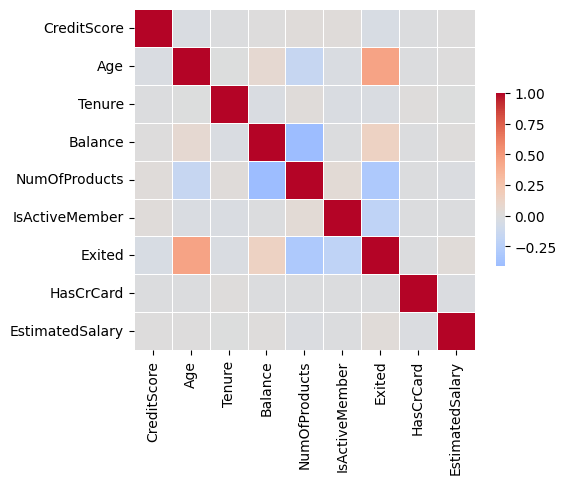

In [102]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Gender', 'Geography']
# Select only numeric columns
correlation_matrix = train_traitement.drop(columns=categorical_columns).corr()

# Compute the distance matrix
distance_matrix = 2 * (1 - np.abs(correlation_matrix))

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='single', metric="precomputed").fit(distance_matrix)

# Extract clusters
clusters = [list(correlation_matrix.columns[clustering.labels_ == lab]) for lab in set(clustering.labels_)]

# Reorder the correlation matrix
reordered = np.concatenate(clusters)
R = correlation_matrix.loc[reordered, reordered]

# Plot the heatmap
f, ax = plt.subplots(figsize=(5.5, 4.5))
_ = sns.heatmap(R, cmap='coolwarm', vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [103]:
# enlève colonne balance car elle est très corrélé avec Nombre de produit mais nombre de produit est plus corrélé avec la target que Balance
train_traitement = train_traitement.drop(columns=['Balance'])
# remarque, c'est ce que fait Lasso

## outlier REGARDER DISTRI

Optimization terminated successfully.
         Current function value: 0.341519
         Iterations 7
Indices des outliers détectés : [    0    18    44 ... 14964 14971 14986]


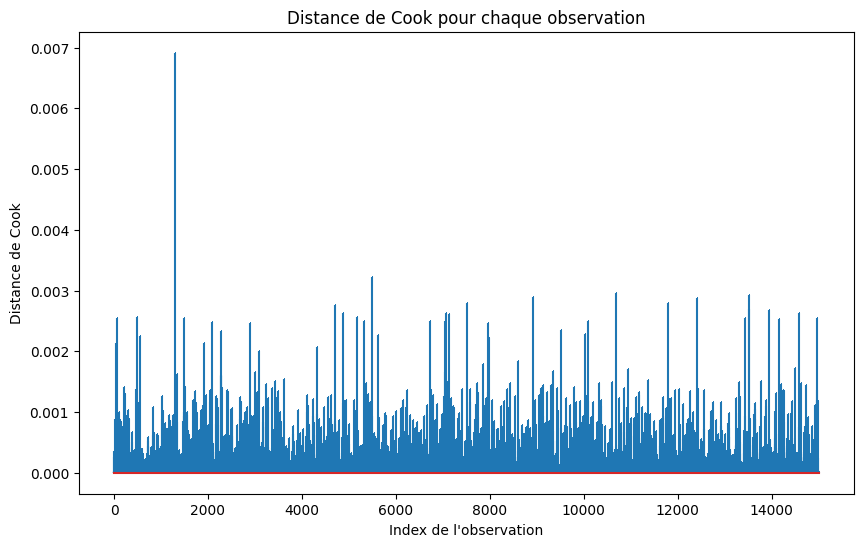

In [104]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt

class OutlierCooksDistance:
    def __init__(self, donnees: pd.DataFrame, variable_cible: str) -> None:
        self.donnees = donnees
        self.variable_cible = variable_cible
        self.colonnes_numeriques = donnees.select_dtypes(include=['float64', 'int64']).columns
        self.colonnes_categorielles = donnees.select_dtypes(include=['object']).columns
        self.variables_features = self.colonnes_numeriques.drop(variable_cible)
        self.X_features_numeriques = self.donnees[self.variables_features]
        self.y_cible = self.donnees[self.variable_cible]
        self.X_features_avec_constante = sm.add_constant(self.X_features_numeriques)

    def ajuster_modele_logistique(self):
        self.modele_logistique = sm.Logit(self.y_cible, self.X_features_avec_constante)
        self.modele_logistique_ajuste = self.modele_logistique.fit()

    def calculer_distances_cook(self):
        influence = self.modele_logistique_ajuste.get_influence()
        self.distances_cook = influence.cooks_distance[0]

    def identifier_outliers(self):
        nombre_observations = len(self.donnees)
        nombre_parametres = self.X_features_avec_constante.shape[1]
        seuil_distance_cook = 4 / (nombre_observations - nombre_parametres)
        self.outliers = np.where(self.distances_cook > seuil_distance_cook)[0]

    def supprimer_outliers(self) -> pd.DataFrame:
        if len(self.outliers) > 0:
            print(f"Indices des outliers détectés : {self.outliers}")
            self.donnees_sans_outliers = self.donnees.drop(index=self.outliers)
        else:
            print("Aucun outlier détecté. Pas de suppression d'observations.")
            self.donnees_sans_outliers = self.donnees
        return self.donnees_sans_outliers

    def tracer_distance_cook(self):
        plt.figure(figsize=(10, 6))
        plt.stem(np.arange(len(self.distances_cook)), self.distances_cook, markerfmt=",")
        plt.title("Distance de Cook pour chaque observation")
        plt.xlabel("Index de l'observation")
        plt.ylabel("Distance de Cook")
        plt.show()

# Exemple d'utilisation
data = train_traitement
variable_cible = 'Exited'
traitement = OutlierCooksDistance(data, variable_cible)
traitement.ajuster_modele_logistique()
traitement.calculer_distances_cook()
traitement.identifier_outliers()
data_train_sans_outlier = traitement.supprimer_outliers()
traitement.tracer_distance_cook()

In [105]:
print("nombre d'observations supprimées : ",)
len (train_traitement)  - len(data_train_sans_outlier)


nombre d'observations supprimées : 


1218

In [106]:
data_traitement = data_train_sans_outlier

## traitement catégorielles TESTER SANS DROP FIRST

In [13]:
train_traitement = pd.get_dummies(train_traitement, columns=['Gender', 'Geography'], drop_first=False)*1


## ajoute nouvelles colonnes pertinentes

Age            
Tenure             
Balance           
NumOfProducts      
HasCrCard        
IsActiveMember    
EstimatedSalary    

## traitement table de test

In [14]:

X = train_traitement.drop(columns=['Exited'])
y = train_traitement['Exited']
test_traitement = test.drop(columns=['Surname', 'id', 'CustomerId',"Balance"])
test_traitement = pd.get_dummies(test_traitement, columns=['Gender', 'Geography'], drop_first=False)*1


# 2. Premier modèle <a class="anchor" id="Introduction"></a>
---


In [108]:
# import statsmodels.api as sm

# X = train_traitement.drop(columns=['Exited'])
# y = train_traitement['Exited']
    
# # Add a constant to the model
# X = sm.add_constant(X)

# # Fit the logistic regression model
# logit_model = sm.Logit(y, X).fit()

# # Print the summary of the model
# print(logit_model.summary())



Optimization terminated successfully.
         Current function value: 0.319142
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14989
Method:                           MLE   Df Model:                           10
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                  0.3610
Time:                        16:29:01   Log-Likelihood:                -4787.1
converged:                       True   LL-Null:                       -7492.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.7432      0.299    -12.531      0.000      -4.329      -3.158
CreditSc

In [109]:

# test_traitement = test.drop(columns=['Surname', 'id', 'CustomerId',"Balance"])
# test_traitement = pd.get_dummies(test_traitement, columns=['Gender', 'Geography'], drop_first=True)*1
# test_traitement = sm.add_constant(test_traitement)


In [110]:

# test_predictions = logit_model.predict(test_traitement)
# print(test_predictions)


0       0.232320
1       0.073524
2       0.043444
3       0.560649
4       0.198805
5       0.071802
6       0.006959
7       0.019595
8       0.006345
9       0.003147
10      0.439398
11      0.242238
12      0.171770
13      0.006848
14      0.107236
15      0.028064
16      0.025521
17      0.125034
18      0.023617
19      0.176151
20      0.010784
21      0.561470
22      0.105552
23      0.770548
24      0.037069
25      0.143590
26      0.016740
27      0.697638
28      0.008417
29      0.215274
30      0.148970
31      0.750246
32      0.641616
33      0.337303
34      0.849250
35      0.028207
36      0.014917
37      0.618448
38      0.184432
39      0.012506
40      0.277180
41      0.489988
42      0.966929
43      0.125632
44      0.006924
45      0.098398
46      0.028641
47      0.117896
48      0.184738
49      0.064852
50      0.052044
51      0.045845
52      0.011680
53      0.014634
54      0.564893
55      0.065283
56      0.103068
57      0.790232
58      0.0423

In [111]:
# # Create a new dataframe with 'id' and 'test_predictions'
# test_predictions_df = pd.DataFrame({'id': test['id'], 'Predictions': test_predictions})

# # Display the new dataframe
# print(test_predictions_df.head())

      id  Predictions
0  15000     0.232320
1  15001     0.073524
2  15002     0.043444
3  15003     0.560649
4  15004     0.198805


In [113]:
# # Save the test_predictions_df to a CSV file
# test_predictions_df.to_csv('test_predictions.csv', index=False)

pycarest pour tester tous les modèles. 
LIGHT GBM


# 3. Modèle GradientBoosting <a class="anchor" id="Introduction"></a>
---


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gbc = GradientBoostingClassifier(
    ccp_alpha=0.0,
    criterion='friedman_mse',
    init=None,
    learning_rate=0.1,
    loss='log_loss',
    max_depth=3,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_iter_no_change=None,
    random_state=123,
    subsample=1.0,
    tol=0.0001,
    validation_fraction=0.1,
    verbose=0,
    warm_start=False
)

gbc.fit(X, y)


GradientBoostingClassifier(random_state=123)

In [137]:
y_pred = gbc.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8984
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     12010
         1.0       0.80      0.65      0.72      2990

    accuracy                           0.90     15000
   macro avg       0.86      0.81      0.83     15000
weighted avg       0.89      0.90      0.89     15000



In [1]:
# ajouter stratified k foold

# 4. Modèle ADAM 

In [22]:
pip install tensorflow


     -------------------------------------- 390.2/390.2 MB 2.0 MB/s eta 0:00:00
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl (431 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl (7.8 kB)
     ---------------------------------------- 4.4/4.4 MB 2.5 MB/s eta 0:00:00
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
     ---------------------------------------- 3.0/3.0 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 kB 1.8 MB/s eta 0:00:00
     ----------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
adam = Adam(learning_rate=0.1)  # Set learning_rate to 0.1 as specified
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model with mini-batch gradient descent
model.fit(X, y, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy}")


# Predict on the test set
test_predictions = model.predict(test_traitement)
print(test_predictions)

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7969 - loss: 0.5048  
Accuracy: 0.8006666898727417
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.2110749]
 [0.2110749]
 [0.2110749]
 ...
 [0.2110749]
 [0.2110749]
 [0.2110749]]


# Fin. Prediction <a class="anchor" id="Introduction"></a>
---

In [55]:
modele_choisi = gbc

In [56]:
# Get the predicted probabilities
test_predictions_proba = modele_choisi.predict_proba(test_traitement)[:, 1]

# Display the predicted probabilities
print(test_predictions_proba)

[0.08714901 0.02089834 0.01430978 ... 0.01564025 0.05358344 0.36969551]


In [66]:
# Create a new dataframe with 'id' and 'test_predictions'
test_predictions_df = pd.DataFrame({'id': test['id'], 'Predictions': test_predictions_proba})

# Display the new dataframe
print(test_predictions_df.head())

      id  Predictions
0  15000     0.087149
1  15001     0.020898
2  15002     0.014310
3  15003     0.622815
4  15004     0.035953


In [20]:
# Save the test_predictions_df to a CSV file
test_predictions_df.to_csv('test_predictions.csv', index=False)